In [1]:
import os
import cv2
import torchvision
from torchvision import datasets
import torch
import imutils
from torchvision.transforms import transforms
import torchvision.models as models
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils.video import VideoStream
Image.LOAD_TRUNCATED_IMAGES = True
plt.ion()

OSError: [WinError 127] The specified procedure could not be found. Error loading "C:\ProgramData\Anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops.dll" or one of its dependencies.

In [17]:
print("[INFO] loading model...")

model = torch.load('./trained-models/model_final.pth', map_location=torch.device('cpu'))
#model.eval()

[INFO] loading model...


In [18]:
class_names = class_names = ['Fire', 'Neutral', 'Smoke']

def predict(image):
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    image = image.cuda()

    pred = model(image)
    idx = torch.argmax(pred)
    prob = pred[0][idx].item()*100
    
    return class_names[idx], prob

## Image

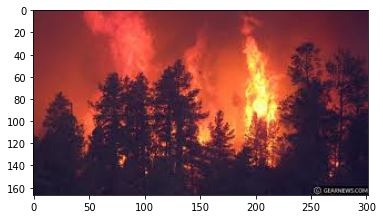

AssertionError: Torch not compiled with CUDA enabled

In [24]:
img = Image.open('./test-imgs/image_14.jpg')
plt.imshow(img)
plt.show()

prediction, prob = predict(img)
#print(prediction, prob)

## Video